 # A CNN model for American Sign Language detection.

## Preprocessing

In [1]:
# Import os module
import os

In [8]:
import matplotlib.pyplot as plt
print(os.listdir("C:\\Users\\LEGION\\Desktop\\ML_files"))
print(os.getcwd())
print(os.listdir())
dir_content_no = []

# os.chdir("asl_dataset\\all_data") # commented out after changing directory

for dir in os.listdir():
    dir_content_no.append(len(os.listdir(dir)))
print(dir_content_no)
    

['.git', '.ipynb_checkpoints', 'asl_dataset', 'Sign_language_detection.ipynb']
C:\Users\LEGION\Desktop\ML_files
['.git', '.ipynb_checkpoints', 'asl_dataset', 'Sign_language_detection.ipynb']
[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 65, 70, 70, 70, 70, 70, 70]


In [10]:
import shutil

# Dividing the items in all_data directory for training and testing 
# Training:Testing = 4:1

directory_tuples_list = []
for dir in os.listdir():
    
    dir_i = os.getcwd() + "\\" + dir
    dir_items = os.listdir(dir_i)
    
    tr_no = len(dir_items)//10 *8
    te_no = len(dir_items)-tr_no
    
    directory_tuple = (dir,len(dir_items),tr_no,te_no)
    directory_tuples_list.append(directory_tuple)

    # Creating new identical directories in the training and testing directories to copy training and testing images 
    
    tr_path = "C:\\Users\\LEGION\\Desktop\\ML_files" + "\\asl_dataset\\training_data\\" + dir
    te_path = "C:\\Users\\LEGION\\Desktop\\ML_files" + "\\asl_dataset\\testing_data\\" + dir
    os.makedirs(tr_path)
    os.makedirs(te_path)

    # Copying the images   
    
    for i in range(1,tr_no):
        item = 'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\all_data\\' + dir +'\\' + dir_items[i]
        shutil.copy(item, tr_path)
        
    for j in range(tr_no+1, len(dir_items)):
        item = 'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\all_data\\' + dir + '\\' + dir_items[j]
        shutil.copy(item, te_path)
   
print(directory_tuples_list)         

[('0', 70, 56, 14), ('1', 70, 56, 14), ('2', 70, 56, 14), ('3', 70, 56, 14), ('4', 70, 56, 14), ('5', 70, 56, 14), ('6', 70, 56, 14), ('7', 70, 56, 14), ('8', 70, 56, 14), ('9', 70, 56, 14), ('a', 70, 56, 14), ('b', 70, 56, 14), ('c', 70, 56, 14), ('d', 70, 56, 14), ('e', 70, 56, 14), ('f', 70, 56, 14), ('g', 70, 56, 14), ('h', 70, 56, 14), ('i', 70, 56, 14), ('j', 70, 56, 14), ('k', 70, 56, 14), ('l', 70, 56, 14), ('m', 70, 56, 14), ('n', 70, 56, 14), ('o', 70, 56, 14), ('p', 70, 56, 14), ('q', 70, 56, 14), ('r', 70, 56, 14), ('s', 70, 56, 14), ('t', 65, 48, 17), ('u', 70, 56, 14), ('v', 70, 56, 14), ('w', 70, 56, 14), ('x', 70, 56, 14), ('y', 70, 56, 14), ('z', 70, 56, 14)]


Training data:


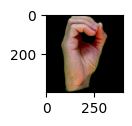

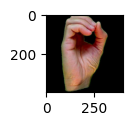

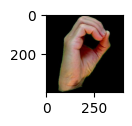

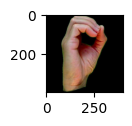

In [2]:
# Visualize  sample training and testing images

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

train_path = "C:\\Users\\LEGION\\Desktop\\ML_files" + "\\asl_dataset\\training_data\\0\\"  
test_path = "C:\\Users\\LEGION\\Desktop\\ML_files" + "\\asl_dataset\\testing_data\\0\\"

def plot_train_image(train_path):
    print("Training data:")
    count = 0
    for image in os.listdir(train_path):
        img = mpimg.imread(train_path+image)
        plt.figure(figsize=(1,1))
        plt.imshow(img)
        count+=1
        if count == 5:
            break
           
def plot_test_image(test_path):
    count = 0
    print("Testing data:")
    for image in os.listdir(test_path):
        img = mpimg.imread(test_path+image)
        plt.figure(figsize=(1,1))
        plt.imshow(img)
        count+=1
        if count == 5:
            break

plot_train_image(train_path)
plt.close()    

Testing data:


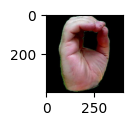

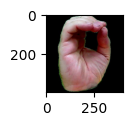

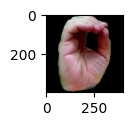

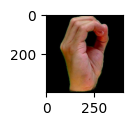

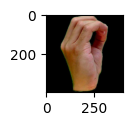

In [3]:
plot_test_image(test_path)

## CNN model definition

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [5]:
# Callback function

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if (logs.get('val_accuracy') >= 0.7):
            print('\nDesired validation accuracy reached !, training stopped....')
            self.model.stop_training = True
callbacks = MyCallback()

In [6]:
def model_definition(train_data_generator, test_data_generator):
    
    model = tf.keras.models.Sequential([
        
       
        tf.keras.layers.Conv2D(64, (2,2), activation='relu', strides = (2,2), input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
       
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(36, activation='softmax')
    ])

    model.summary()
    
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
    history = model.fit(train_data_generator,steps_per_epoch=11, epochs=100,verbose=1,callbacks = [callbacks], validation_data = test_data_generator)
    return model,history

## Data-Preprosessing

In [13]:
os.getcwd()

'C:\\Users\\LEGION\\Desktop\\ML_files'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 5 using train_datagen generator
train_data_generator = train_datagen.flow_from_directory(
        'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\training_data',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=5,
        
        class_mode='binary')

# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 5 using train_datagen generator
test_data_generator = train_datagen.flow_from_directory(
        'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\testing_data',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=5,
        
        class_mode='binary')

Found 1972 images belonging to 36 classes.
Found 471 images belonging to 36 classes.


## Training

In [8]:
model,history = model_definition(train_data_generator, test_data_generator)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

### Result Visualization

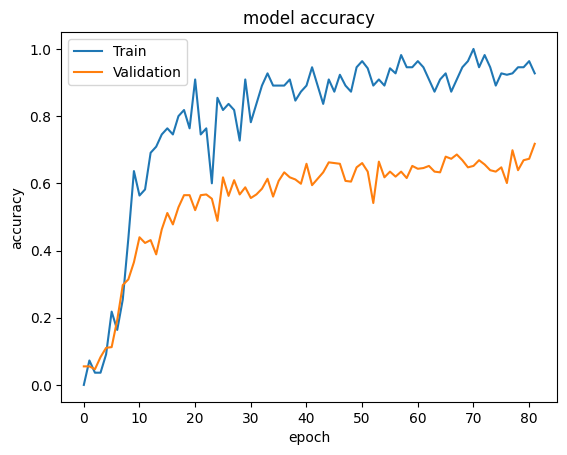

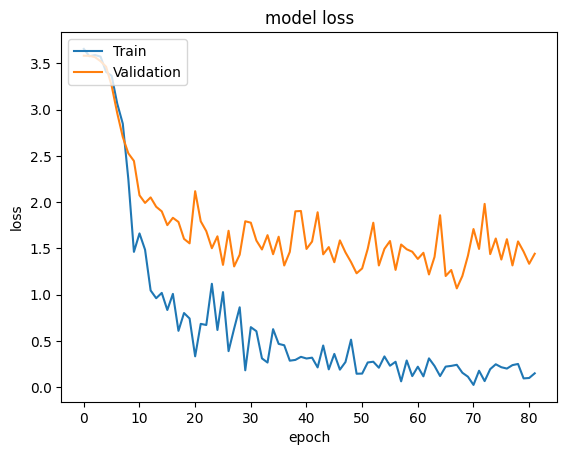

In [9]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

In [11]:
test_img = tf.keras.utils.load_img(
    'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\testing_data\\0\\hand4_0_bot_seg_3_cropped.jpeg',
    color_mode = 'rgb',
    target_size = (300,300,3)
)
test_img = tf.keras.utils.img_to_array(test_img)
test_img /= 255
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
softmax_array = prediction[0].tolist()
predtn = softmax_array.index(max(softmax_array))
print(predtn)

1/1 [==============================] - 0s 37ms/step
24


##### The image was for '0' but the model predicted it to be 'o'

In [20]:
# Second test
test_img = tf.keras.utils.load_img(
    'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\testing_data\\1\\hand4_1_bot_seg_3_cropped.jpeg',
    color_mode = 'rgb',
    target_size = (300,300,3)
)
test_img = tf.keras.utils.img_to_array(test_img)
test_img /= 255
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
softmax_array = prediction[0].tolist()
predtn = softmax_array.index(max(softmax_array))
print(predtn)

1/1 [==============================] - 0s 37ms/step
1


##### Image: '1', predicted: '1'

In [21]:
# Third test
test_img = tf.keras.utils.load_img(
    'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\testing_data\\7\\hand4_7_bot_seg_3_cropped.jpeg',
    color_mode = 'rgb',
    target_size = (300,300,3)
)
test_img = tf.keras.utils.img_to_array(test_img)
test_img /= 255
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
softmax_array = prediction[0].tolist()
predtn = softmax_array.index(max(softmax_array))
print(predtn)

1/1 [==============================] - 0s 37ms/step
7


##### Image: '7', predicted: '7'

In [22]:
# Fourth test
test_img = tf.keras.utils.load_img(
    'C:\\Users\\LEGION\\Desktop\\ML_files\\asl_dataset\\testing_data\\f\\hand4_f_bot_seg_3_cropped.jpeg',
    color_mode = 'rgb',
    target_size = (300,300,3)
)
test_img = tf.keras.utils.img_to_array(test_img)
test_img /= 255
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
softmax_array = prediction[0].tolist()
predtn = softmax_array.index(max(softmax_array))
print(predtn)

1/1 [==============================] - 0s 41ms/step
15


##### Image: 'f', predicted: 'f'

In [24]:

model.save("model.h5")